In [208]:
import sys
sys.path.append('C:/Users/JJH/Downloads/빅데이터 멀티캠퍼스/데이터분석 포트폴리오')
import muresa
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 탐색적 분석

In [209]:
df = pd.read_csv('creditcard.csv')
X = df.iloc[:,0:30].copy()
y = df.iloc[:,30].copy()

In [210]:
idx = (df.loc[:,'Class'] == 1)
ones = df[idx].copy()
zero = df[-idx].copy()

In [211]:
df.head(1) # Time, Amount 이외에는 PCA(V1-V28)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [212]:
# V1-V28 은 분산의 내림차순
X.var() 

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
dtype: float64

## 1-1 탐색적 분석 : Time

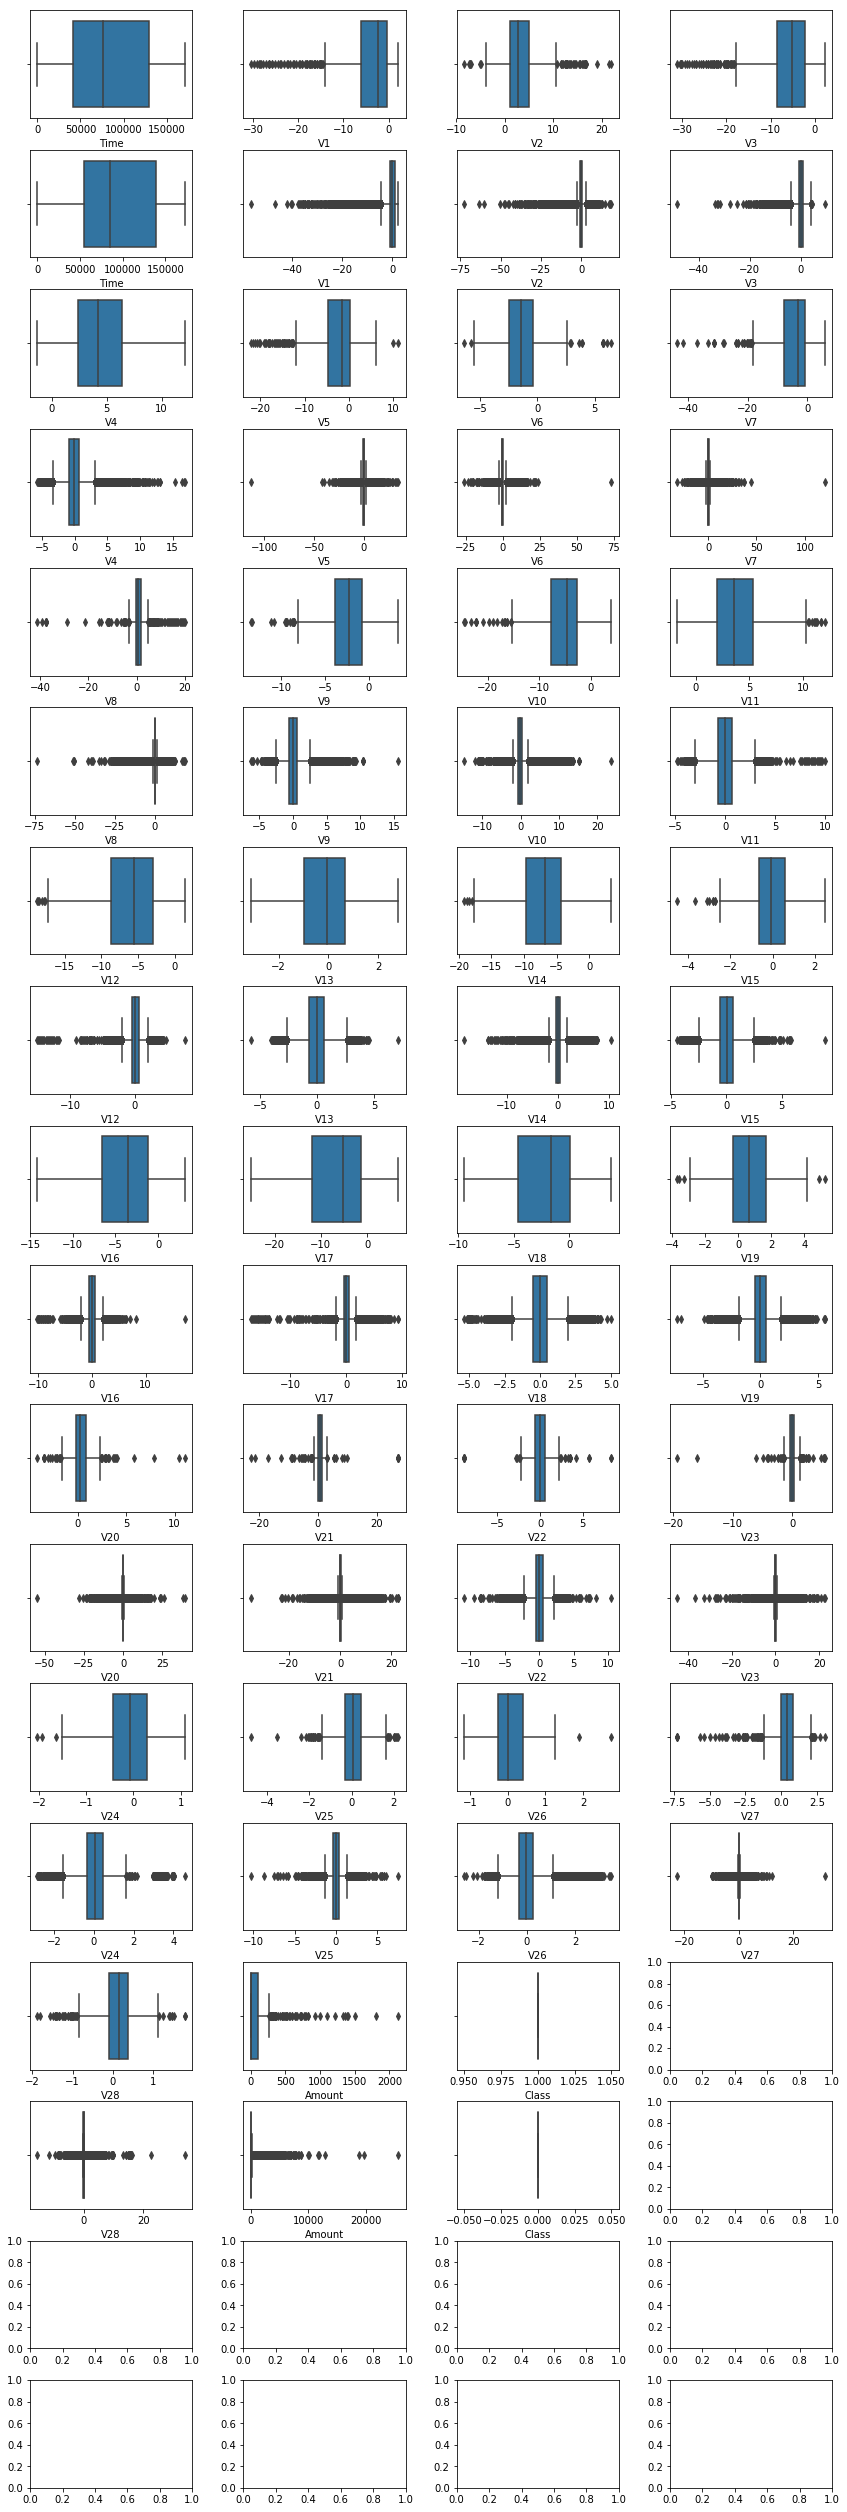

In [213]:
fig, ax = plt.subplots(18,4, figsize=(12, 35))
fig.tight_layout()
i=0
j=0

for idx in range(len(ones.columns)):
    sns.boxplot(ones.iloc[:,idx], ax=ax[j,i])
    sns.boxplot(zero.iloc[:,idx], ax=ax[j+1,i])
    i += 1
    if i == 4 : 
        i = 0
        j += 2
plt.show()
        

In [214]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [215]:
# Time의 범위 파악
time_max = int(np.max(X.Time))
print('min : ', np.min(X.Time))
print('max : ', time_max)
print(time_max // 60) # min
print(time_max // 60 // 60 ) #hour
print(time_max // 60 // 60 // 24) # day

# 시간대로 나눌 필요가 있음

min :  0.0
max :  172792
2879
47
1


In [216]:
Time = X.Time.astype('int32')
Hour = Time // 60 // 60 % 24
Hour2 = Time // 60 // 60 % 24 // 2 # 2시간 단위
Hour4 = Time // 60 // 60 % 24 // 4   # 4시간 단위
Hour6 = Time // 60 // 60 % 24 // 6   # 6시간 단위

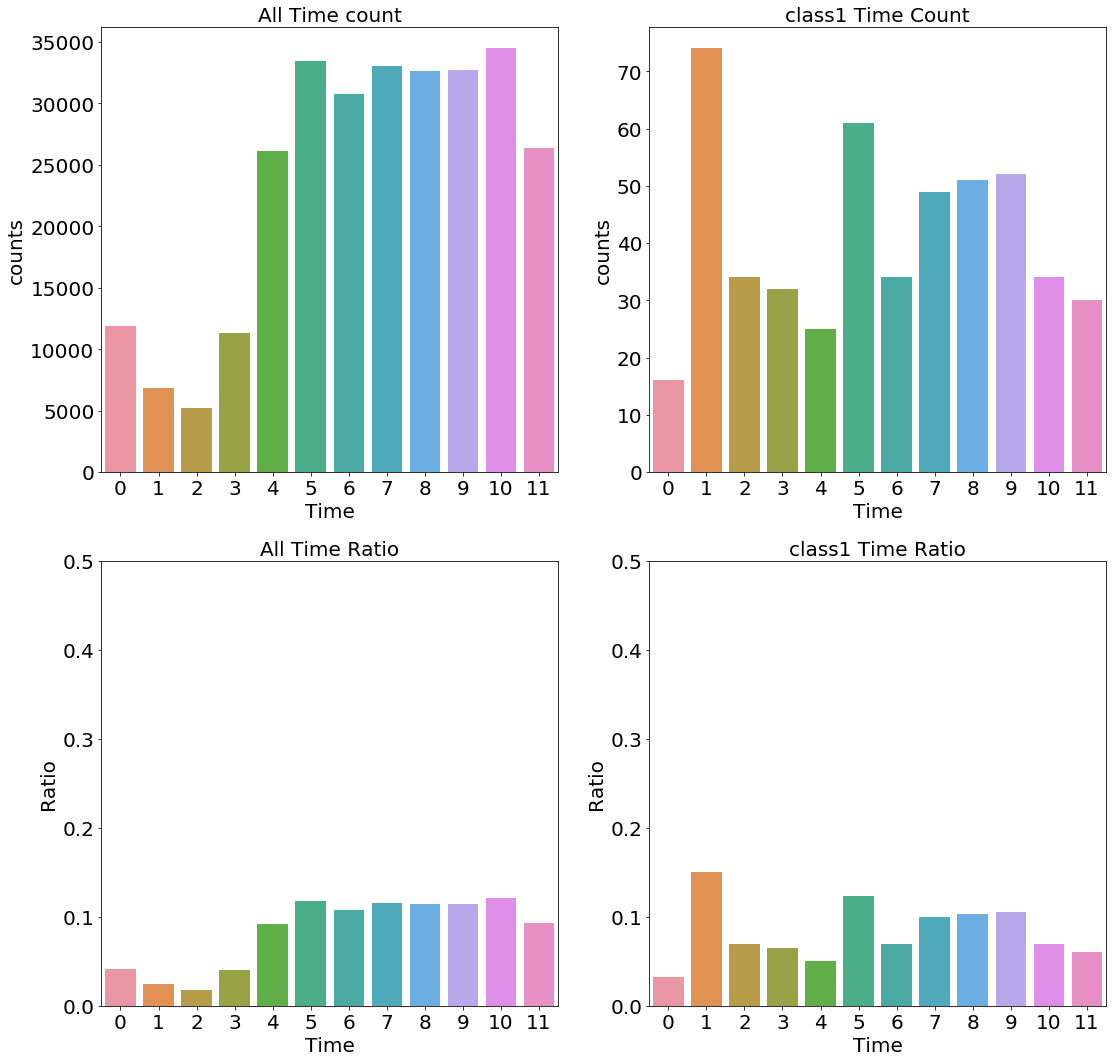

In [217]:
term = 2  # 시간 텀 조절 변수
df2 = df.copy()
df2.Time = df.Time.astype('int32')
df2.Time = df2.Time//60//60%24//term

ones2 = ones.Time.copy()
ones2 = ones2.astype('int32')
ones2 = ones2//60//60%24//term

fig2, ax = plt.subplots(2,2, figsize=(18, 18))
#fig2.tight_layout()

#ax[0,0].set(title='All Time count')
a = sns.countplot(df2.Time, ax=ax[0,0])
a.set_title('All Time count', fontsize=20)
a.set_xlabel('Time', fontsize=20)
a.set_ylabel('counts', fontsize=20)
a.tick_params(labelsize=20)

b = sns.countplot(ones2, ax=ax[0,1])
b.set_title('class1 Time Count', fontsize=20)
b.set_xlabel('Time', fontsize=20)
b.set_ylabel('counts', fontsize=20)
b.tick_params(labelsize=20)

c = sns.barplot(x=df2.Time, y=df2.Time,
            estimator=lambda x: len(x)/len(df2.Time), 
            ax=ax[1,0])
ax[1,0].set(ylim = (0,0.5))
c.set_title('All Time Ratio', fontsize=20)
c.set_xlabel('Time', fontsize=20)
c.set_ylabel('Ratio', fontsize=20)
c.tick_params(labelsize=20)

d = sns.barplot(x=ones2, y=ones2, 
            estimator=lambda x: len(x)/len(ones2), 
            ax=ax[1,1])
ax[1,1].set(ylim = (0,0.5))
d.set_title('class1 Time Ratio', fontsize=20)
d.set_xlabel('Time', fontsize=20)
d.set_ylabel('Ratio', fontsize=20)
d.tick_params(labelsize=20)

#### Time 의 경우 시간대에 따라 Class 0과 1의 차이가 있음
#### 차이가 큰 시간대로 정렬하여 정규화하여 변수로 사용 가능할듯

In [218]:
# 단순 정규화로는 사용하는 의미가 없어짐
scaler = MinMaxScaler()

X1 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
ones1 = pd.DataFrame(scaler.fit_transform(ones.iloc[:,:30]), columns=X.columns)

In [219]:
ones1.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.864016,0.339927,0.884270,0.395532,0.650089,0.386613,0.831038,0.695084,0.635230,...,0.280177,0.466293,0.513187,0.760060,0.752766,0.690451,0.341338,0.729425,0.473055,0.000000
1,0.000388,0.841641,0.172189,0.965169,0.268240,0.706774,0.414696,0.889040,0.671179,0.784098,...,0.410249,0.469182,0.540466,0.834540,0.555936,0.724111,0.258421,0.679606,0.522125,0.248839
2,0.023867,0.864287,0.333599,0.921750,0.271338,0.641069,0.491482,0.893836,0.665752,0.786046,...,0.243505,0.450065,0.461164,0.785866,0.622125,0.661747,0.156504,0.707945,0.470382,0.112862


In [220]:
kms = KMeans(5, max_iter = 50)
kms.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [221]:
ones.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


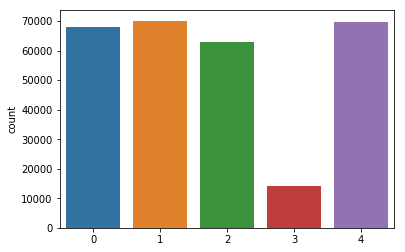

In [222]:
#kms.labels_
sns.countplot(kms.labels_)
plt.show()

In [223]:
print(X[kms.labels_ == 0].index)
print(X[kms.labels_ == 1].index)
print(X[kms.labels_ == 2].index)
print(X[kms.labels_ == 3].index)
print(X[kms.labels_ == 4].index)

Int64Index([208434, 208765, 208873, 209346, 209411, 209463, 209555, 210200,
            210301, 210499,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=68046)
Int64Index([ 74013,  74971,  76361,  76561,  76756,  76968,  77041,  77206,
             77244,  77298,
            ...
            154779, 154789, 154793, 154795, 154830, 154858, 154877, 155296,
            155299, 155741],
           dtype='int64', length=70095)
Int64Index([151263, 151523, 151728, 152018, 152054, 152108, 152179, 152244,
            152316, 152328,
            ...
            222300, 222465, 222528, 222816, 223012, 223028, 223572, 223578,
            224180, 224535],
           dtype='int64', length=62806)
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            42856, 42887, 42936, 42945, 42958, 43061, 43160, 43204, 43428,
            43681],


In [224]:
pred = kms.predict(ones.iloc[:,:30])

#### 거리 차이를 통해 군집이 나뉘는 KMeans 에서는 Time, Amount의 영향을 많이 받음
#### 각 변수의 값 범위가 같으면 군집에대해 각 변수가 같은 기여도를 가지는 것

In [225]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 1-2 탐색적 분석 : Amount

In [226]:
print(X.Amount.mean())
print(X.Amount.var())

88.34961925093133
62560.06904632383


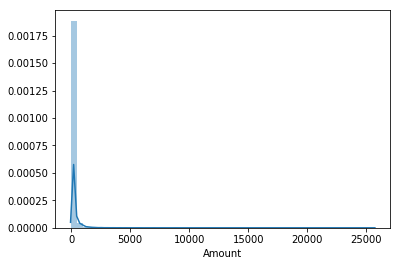

In [227]:
sns.distplot(X.Amount)

1825
27


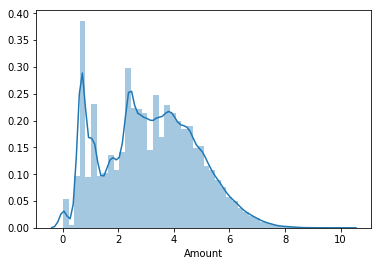

In [228]:
print(np.sum(X.Amount==0)) # 거래금액이 0원이 존재함 로그에 고려
print(np.sum((df.Amount ==0) & (df.Class == 1))) 
# 거래금액 0인 이상거래가 존재하므로 행 제거는 불가

#거래금액에 +1 이후 로그 적용
sns.distplot(np.log(X.Amount+1))

In [230]:
log_Amount = np.log(X.Amount+1)
print(log_Amount.max())
print(log_Amount.min())
print(log_Amount.mean())
print(log_Amount.var())

10.153941165977784
0.0
3.152188061233118
2.744483878988161


# 1-3 탐색적 분석 : V1-V28

In [193]:
# V1-28 의 통계치 확인
v_stat = []
head = ['max','min','term','mean','var']
for v in X.columns[1:29]:
    v_stat.append( [X[v].max(), X[v].min(),X[v].max()-X[v].min(),
                    X[v].mean(),X[v].var()] )
df_v_stat = pd.DataFrame(v_stat, columns = head)

In [194]:
print(df_v_stat)
# 평균 : 0, 분산 0 ~ 4  (표준화된 것으로 취급)

# 결론 : 정규화 및 변수 제거 고려할 것

           max         min        term          mean       var
0     2.454930  -56.407510   58.862440  1.165980e-15  3.836489
1    22.057729  -72.715728   94.773457  3.416908e-16  2.726820
2     9.382558  -48.325589   57.708148 -1.373150e-15  2.299029
3    16.875344   -5.683171   22.558515  2.086869e-15  2.004684
4    34.801666 -113.743307  148.544973  9.604066e-16  1.905081
5    73.301626  -26.160506   99.462131  1.490107e-15  1.774946
6   120.589494  -43.557242  164.146736 -5.556467e-16  1.530401
7    20.007208  -73.216718   93.223927  1.177556e-16  1.426479
8    15.594995  -13.434066   29.029061 -2.406455e-15  1.206992
9    23.745136  -24.588262   48.333399  2.239751e-15  1.185594
10   12.018913   -4.797473   16.816387  1.673327e-15  1.041855
11    7.848392  -18.683715   26.532107 -1.254995e-15  0.998403
12    7.126883   -5.791881   12.918764  8.176030e-16  0.990571
13   10.526766  -19.214325   29.741092  1.206296e-15  0.918906
14    8.877742   -4.498945   13.376686  4.913003e-15  0

# 2. Feature Engineering

## 2-1 Feature Engineering : Time

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('creditcard.csv')
X = df.iloc[:,0:30].copy()
y = df.iloc[:,30].copy()

In [75]:
idx = (df.loc[:,'Class'] == 1)
zero = df[-idx].copy()
ones = df[idx].copy()

#### 1 step : 2시간 단위로 시간 설정

In [146]:
Time = X.Time.astype('int32')
Hour2 = Time // 60 // 60 % 24 // 2 # 2시간 단위

t0 = zero.Time.astype('int32').copy()
t1 = ones.Time.astype('int32').copy()
t0 = t0// 60 // 60 % 24 // 2
t1 = t1 // 60 // 60 % 24 // 2

In [100]:
def t0t1_countplots(t0, t1):
    fig, ax = plt.subplots(1,2, figsize=(9, 9))
    fig_t0 = sns.countplot(t0, ax = ax[0])
    fig_t1 = sns.countplot(t1, ax = ax[1])
    return
def t0t1_ratioplots(t0,t1, ylimit = 0.3):
    fig, ax = plt.subplots(1,2, figsize=(9, 9))
    fig_t0 = sns.barplot(x=t0, y=t0, 
                estimator=lambda x: len(x)/len(t0), 
                ax=ax[0])
    fig_t1 = sns.barplot(x=t1, y=t1, 
                estimator=lambda x: len(x)/len(t1), 
                ax=ax[1])
    ax[0].set(ylim = (0, ylimit))
    ax[1].set(ylim = (0, ylimit))
    return

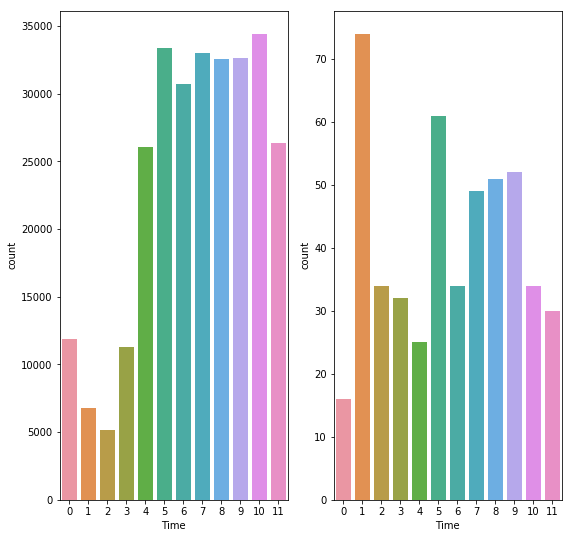

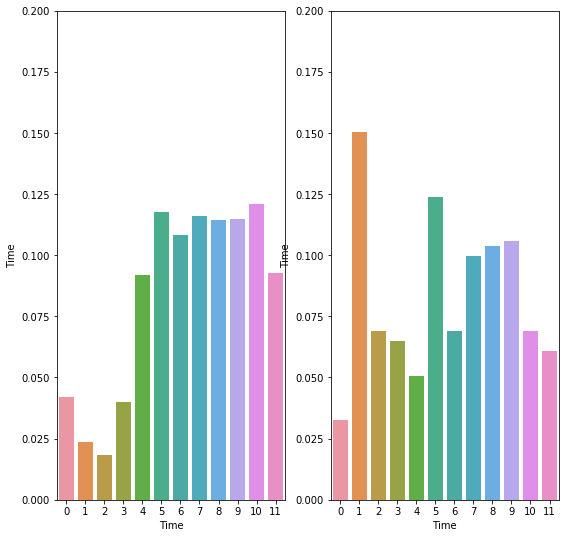

In [102]:
t0t1_countplots(t0,t1)
t0t1_ratioplots(t0,t1, ylimit = 0.2)

In [121]:
# 각 클래스 별 time 변수의 value_count 비율을 내림차순으로 정렬
print(t0.value_counts() / len(t0))
print(t1.value_counts() / len(t1))

# 각 클래스 별 time 변수 value_count 내림차순
print(t0.value_counts().index)
print(t1.value_counts().index)

10    0.121080
5     0.117451
7     0.116005
9     0.114788
8     0.114549
6     0.108158
11    0.092675
4     0.091761
0     0.041851
3     0.039787
1     0.023727
2     0.018166
Name: Time, dtype: float64
1     0.150407
5     0.123984
9     0.105691
8     0.103659
7     0.099593
10    0.069106
6     0.069106
2     0.069106
3     0.065041
11    0.060976
4     0.050813
0     0.032520
Name: Time, dtype: float64
Int64Index([10, 5, 7, 9, 8, 6, 11, 4, 0, 3, 1, 2], dtype='int64')
Int64Index([1, 5, 9, 8, 7, 10, 6, 2, 3, 11, 4, 0], dtype='int64')


In [119]:
# value 의 차이가 큰 순서로 정렬

# 같은 value 의 비율 차이를 구하고 절대값의 내림차순 정렬
t0_ratio = t0.value_counts(sort = False) / len(t0)
t1_ratio = t1.value_counts(sort = False) / len(t1)

sub = t0_ratio - t1_ratio
print(sub)

sub_order = abs(sub).sort_values(ascending=False)
print(sub_order)

0     0.009331
1    -0.126679
2    -0.050939
3    -0.025254
4     0.040948
5    -0.006533
6     0.039053
7     0.016412
8     0.010890
9     0.009097
10    0.051975
11    0.031700
Name: Time, dtype: float64
1     0.126679
10    0.051975
2     0.050939
4     0.040948
6     0.039053
11    0.031700
3     0.025254
7     0.016412
8     0.010890
0     0.009331
9     0.009097
5     0.006533
Name: Time, dtype: float64


#### 2 step : 시간대 순서 변환

In [148]:
# Time value re mapping
# suborder mapping new values 0-11
# input : list
# output: transformed list
def time_trasform( time_list ):
    diff_order = [1,10,2,4,6,11,3,7,8,0,9,5]
    target = range(0,12)
    dic_trans = dict(zip(diff_order,target))
    result = []
    for t in time_list:
        result.append( dic_trans[t] )
    return result

In [155]:
t0_tranformed = time_trasform(t0)
t1_tranformed = time_trasform(t1)

In [154]:
print(list(zip(t0,t0_tranformed)))

[(0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9), (0, 9),

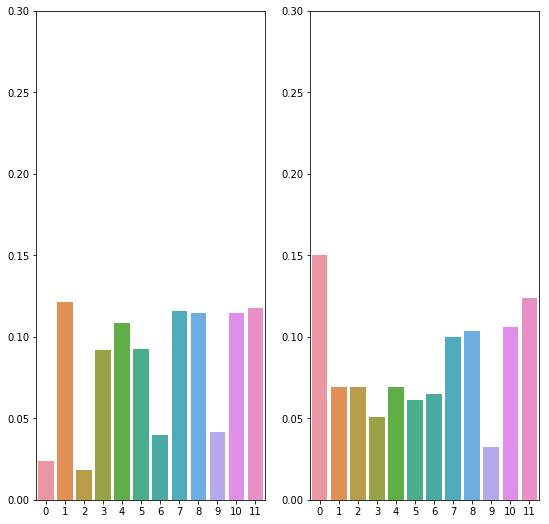

In [156]:
t0t1_ratioplots(t0_tranformed, t1_tranformed)
# diff desc order

## 2-2 Feature Engineering : Make File

In [250]:
df = pd.read_csv('creditcard.csv')

In [252]:
Time = df.Time.astype('int32')
hour2 = Time // 60 // 60 % 24 // 2     # 2시간 단위로 변환 0~11
new_hour2 = time_trasform(Hour2)       # 시간대 재배치
new_hour2 = np.array( new_hour2) - 5.5 # 0~11 평균 0으로

df.Time = new_hour2

Amount = np.log(df.Amount + 1)   # log 0 방지
Amount = Amount - Amount.mean()  # 평균 0으로 평행이동

df.Amount = Amount

In [255]:
df.to_csv('creditcard_pre.csv', index=False)

# 3. Modeling

In [256]:
import sys
sys.path.append('C:/Users/JJH/Downloads/빅데이터 멀티캠퍼스/데이터분석 포트폴리오')
import muresa
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, SGD

In [295]:
df = pd.read_csv('creditcard_pre.csv')
df.shape

(284807, 31)

In [296]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,3.5,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.862572,0


In [297]:
X = df.iloc[:,:30]
y = df.iloc[:,30]
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [298]:
X_train, X_test, y_train, y_test = muresa.UnderSampling(X, y)

In [299]:
n_vars = X.shape[1]
lr_rate = 0.001
epoch = 40
batch = 20

In [300]:
Xph = tf.placeholder(tf.float32, shape=[None,30])
yph = tf.placeholder(tf.float32, shape=[None])

model = Sequential()
model.add(Dense(input_dim = n_vars, units = 20, activation='sigmoid'))
model.add(Dense(units = 10, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

In [301]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [302]:
opt = Adam(lr=lr_rate)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [303]:
summary = model.fit(X_train, y_train, epochs=epoch, batch_size=batch, validation_split=0.1, verbose=0)

In [304]:
summary.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

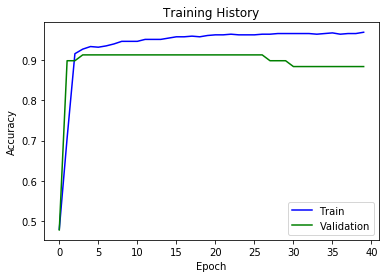

In [305]:
plt.plot(summary.history['acc'], c="b")
plt.plot(summary.history['val_acc'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [306]:
import 평가모듈_190319 as sco
pred = model.predict(X_test)[:,0]
y_pred = (pred > 0.5)*1

#sco.evaluation_class(y_test, y_pred)
from sklearn.metrics import confusion_matrix

conf = confusion_matrix( y_test, y_pred)

In [309]:
print(conf)
print(np.sum(y_test))
pre = conf[1,1] / (conf[1,1]+conf[0,1])
sen = conf[1,1] / (conf[1,1]+conf[1,0])
acc = (conf[1,1]+conf[0,0]) / np.sum(conf)

print(pre)
print(sen)
print(acc)




[[150  12]
 [ 13 121]]
134
0.9097744360902256
0.9029850746268657
0.9155405405405406


#### OverSample

In [311]:
muresa.HelpSampling()

**** code by JJH , Description by JJH ****
** List of Sampling Function **
StratifiedSampling(data, label, ratio=0.3)
UnderSampling(data, label, under=1.0, ratio=0.3)
OverSampling(data, label, over=1.0, ratio=0.3)
SMOTESampling(data, label, over=1.0, ratio=0.3)
** params **
ratio = test data / total data
over, under = minor class / major class
** example **
X_train, X_test, y_train, y_test = StratifiedSampling(X,y)
X_train, X_test, y_train, y_test=UnderSampling(X,y, under=0.5,ratio=0.3)


In [317]:
print(X.shape)
X_train, X_test, y_train, y_test = muresa.SMOTESampling(X, y, over=1.0)
print(X_train.shape)
print(X_test.shape)

(284807, 30)
(398041, 30)
(170589, 30)


In [318]:
n_vars = X.shape[1]
lr_rate = 0.001
epoch = 40
batch = 20

In [319]:
Xph = tf.placeholder(tf.float32, shape=[None,30])
yph = tf.placeholder(tf.float32, shape=[None])

model = Sequential()
model.add(Dense(input_dim = n_vars, units = 20, activation='sigmoid'))
model.add(Dense(units = 10, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

In [320]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [321]:
opt = Adam(lr=lr_rate)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [322]:
summary = model.fit(X_train, y_train, epochs=epoch, batch_size=batch, validation_split=0.1, verbose=0)

In [323]:
summary.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

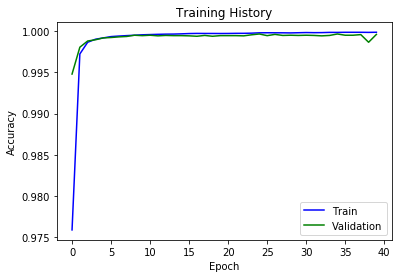

In [324]:
plt.plot(summary.history['acc'], c="b")
plt.plot(summary.history['val_acc'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [325]:
import 평가모듈_190319 as sco
pred = model.predict(X_test)[:,0]
y_pred = (pred > 0.5)*1

#sco.evaluation_class(y_test, y_pred)
from sklearn.metrics import confusion_matrix

conf = confusion_matrix( y_test, y_pred)

In [326]:
print(conf)
print(np.sum(y_test))
pre = conf[1,1] / (conf[1,1]+conf[0,1])
sen = conf[1,1] / (conf[1,1]+conf[1,0])
acc = (conf[1,1]+conf[0,0]) / np.sum(conf)

print(pre)
print(sen)
print(acc)




[[85182    65]
 [    0 85342]]
85342
0.99923893826033
1.0
0.9996189672253193
